# Processing the HST and JWST images

In this tutorial, we will process the HST and JWST images using piXedfit to produce stamp images around a target galaxy that have the same spatial resolution (i.e., PSF size) and spatial sampling. In addition to the stamp images, we will also get maps of multiband fluxes of the target galaxy.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

## Setup inputs

In [2]:
# Set of filters
filters = ['hst_acs_f435w', 'hst_acs_f475w', 'hst_acs_f555w', 'hst_acs_f606w', 'hst_acs_f625w', 'hst_acs_f775w', 
           'hst_acs_f814w', 'hst_acs_f850lp', 'jwst_nircam_f115w', 'jwst_nircam_f150w', 'jwst_nircam_f200w', 
           'jwst_nircam_f277w', 'jwst_nircam_f356w', 'jwst_nircam_f444w', 'jwst_nircam_f480m']
nbands = len(filters)

# directory of the images
dir_images = 'images/'

# input science images
sci_img = {}
sci_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_sci.fits.gz'
sci_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_sci.fits.gz'
sci_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_sci.fits.gz'
sci_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_sci.fits.gz'
sci_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_sci.fits.gz'
sci_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_sci.fits.gz'
sci_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_sci.fits.gz'
sci_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz'
sci_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_sci.fits.gz'

# input weight images
wht_img = {}
wht_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_wht.fits.gz'
wht_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_wht.fits.gz'
wht_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_wht.fits.gz'
wht_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_wht.fits.gz'
wht_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_wht.fits.gz'
wht_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_wht.fits.gz'
wht_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_wht.fits.gz'
wht_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz'
wht_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_wht.fits.gz'

# input variance images
var_img = {}
for bb in range(nbands):
    var_img[filters[bb]] = 'var_'+wht_img[filters[bb]]
    
# Convolution kernels to be used for PSF matching
dir_kernel = 'PSFs_kernels/'
kernels = {}
kernels['hst_acs_f435w'] = dir_kernel+'kernel_HST_F435W_to_JWST_F480M.fits'
kernels['hst_acs_f475w'] = dir_kernel+'kernel_HST_F475W_to_JWST_F480M.fits'
kernels['hst_acs_f555w'] = dir_kernel+'kernel_HST_F555W_to_JWST_F480M.fits'
kernels['hst_acs_f606w'] = dir_kernel+'kernel_HST_F606W_to_JWST_F480M.fits'
kernels['hst_acs_f625w'] = dir_kernel+'kernel_HST_F625W_to_JWST_F480M.fits'
kernels['hst_acs_f775w'] = dir_kernel+'kernel_HST_F775W_to_JWST_F480M.fits'
kernels['hst_acs_f814w'] = dir_kernel+'kernel_HST_F814W_to_JWST_F480M.fits'
kernels['hst_acs_f850lp'] = dir_kernel+'kernel_HST_F850LP_to_JWST_F480M.fits'
kernels['jwst_nircam_f115w'] = dir_kernel+'kernel_JWST_F115W_to_JWST_F480M.fits'
kernels['jwst_nircam_f150w'] = dir_kernel+'kernel_JWST_F150W_to_JWST_F480M.fits'
kernels['jwst_nircam_f200w'] = dir_kernel+'kernel_JWST_F200W_to_JWST_F480M.fits'
kernels['jwst_nircam_f277w'] = dir_kernel+'kernel_JWST_F277W_to_JWST_F480M.fits'
kernels['jwst_nircam_f356w'] = dir_kernel+'kernel_JWST_F356W_to_JWST_F480M.fits'
kernels['jwst_nircam_f444w'] = dir_kernel+'kernel_JWST_F444W_to_JWST_F480M.fits'
kernels['jwst_nircam_f480m'] = None

# The unit, scale, and pixel size
# Pixel size can be obtained using calc_pixsize function
from piXedfit.piXedfit_images import calc_pixsize

img_unit = {}
img_scale = {}
img_pixsizes = {}
for bb in range(0,nbands):
    img_unit[filters[bb]] = 'erg/s/cm2/A'
    
    hdu = fits.open(dir_images+sci_img[filters[bb]])
    img_scale[filters[bb]] = float(hdu[0].header['PHOTFLAM'])
    hdu.close()
    
    img_pixsizes[filters[bb]] = calc_pixsize(dir_images+sci_img[filters[bb]])

# The coordinate and redshift of the target galaxy. 
# In general, redshift information is optional here. 
# We use photometric redshift estimate from EAZY code.
gal_ra = 101.966174
gal_dec = 70.255842
gal_z = 2.134931

# Size of the stamp images to be produced from the image processing
stamp_size = [145,145]

## Run image processing

In [3]:
# Call images_processing class
from piXedfit.piXedfit_images import images_processing

img_process = images_processing(filters, sci_img, var_img, gal_ra, gal_dec, dir_images=dir_images, img_unit=img_unit, 
                                img_scale=img_scale, img_pixsizes=img_pixsizes, kernels=kernels, gal_z=gal_z, 
                                stamp_size=stamp_size, remove_files=False)

produce crop_macs0647-grizli-v6.0-f435w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f435w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f475w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f475w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f555w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f555w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f606w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f606w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f625w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f625w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f775w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f775w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f814w_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f814w_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz
produce crop_var_macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz
produce crop_macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz
produce 

## Plot output stamp images

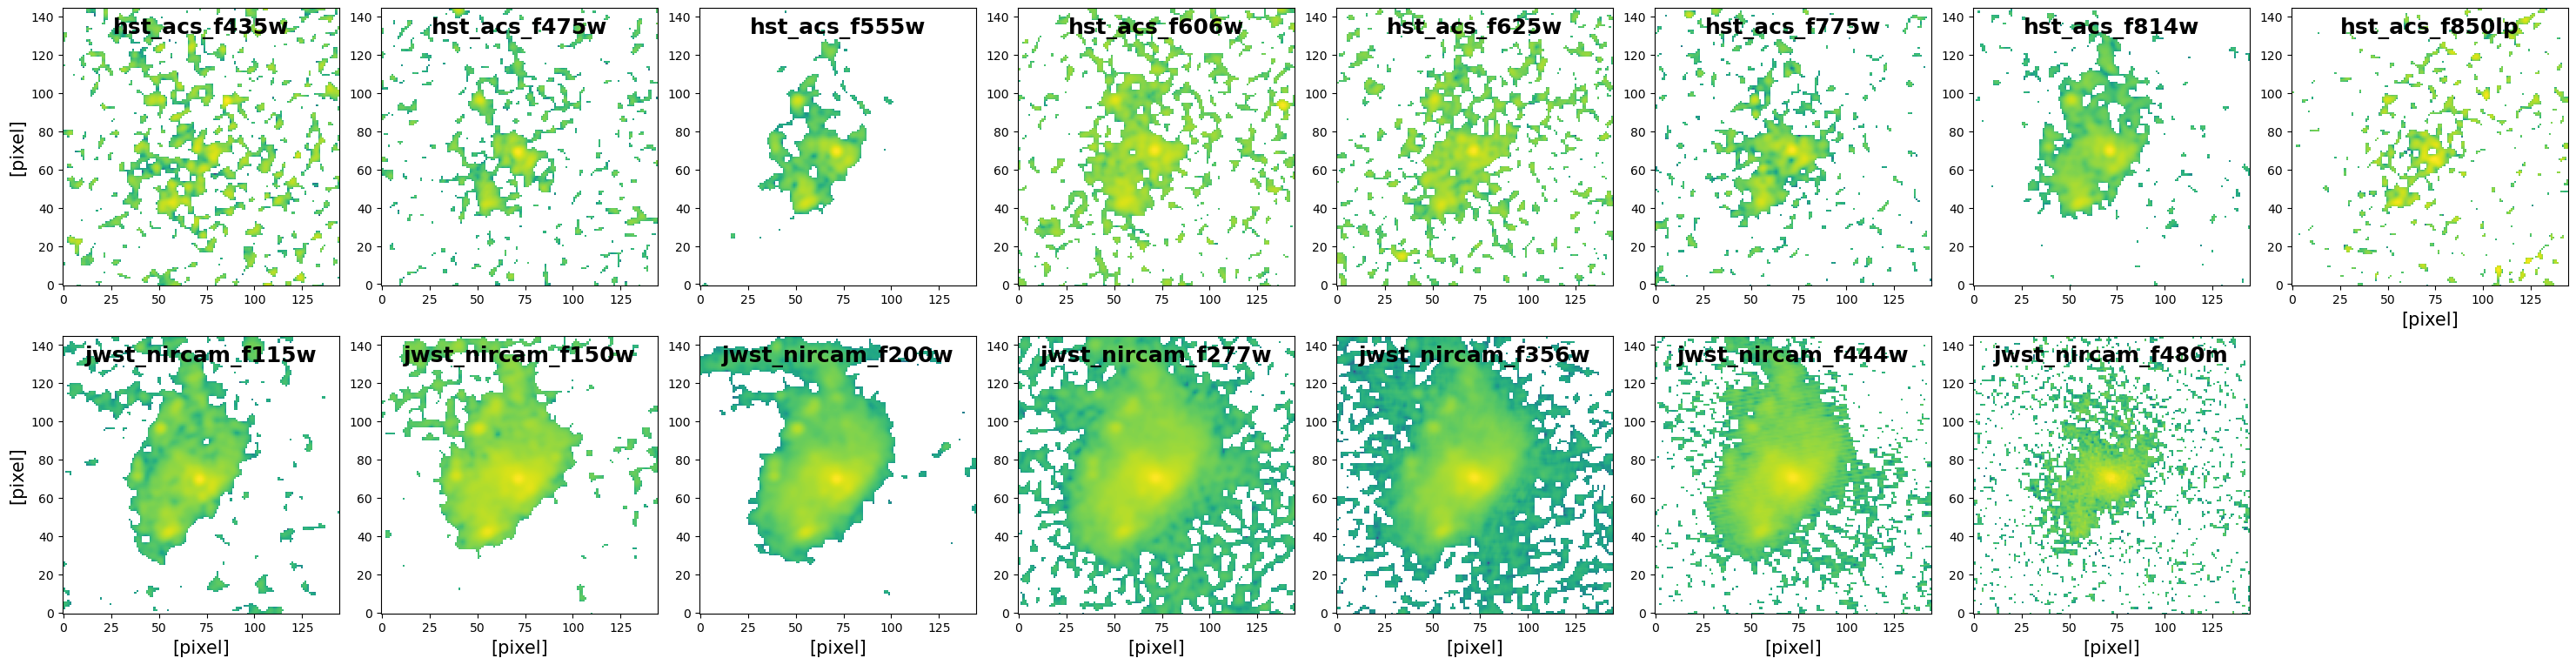

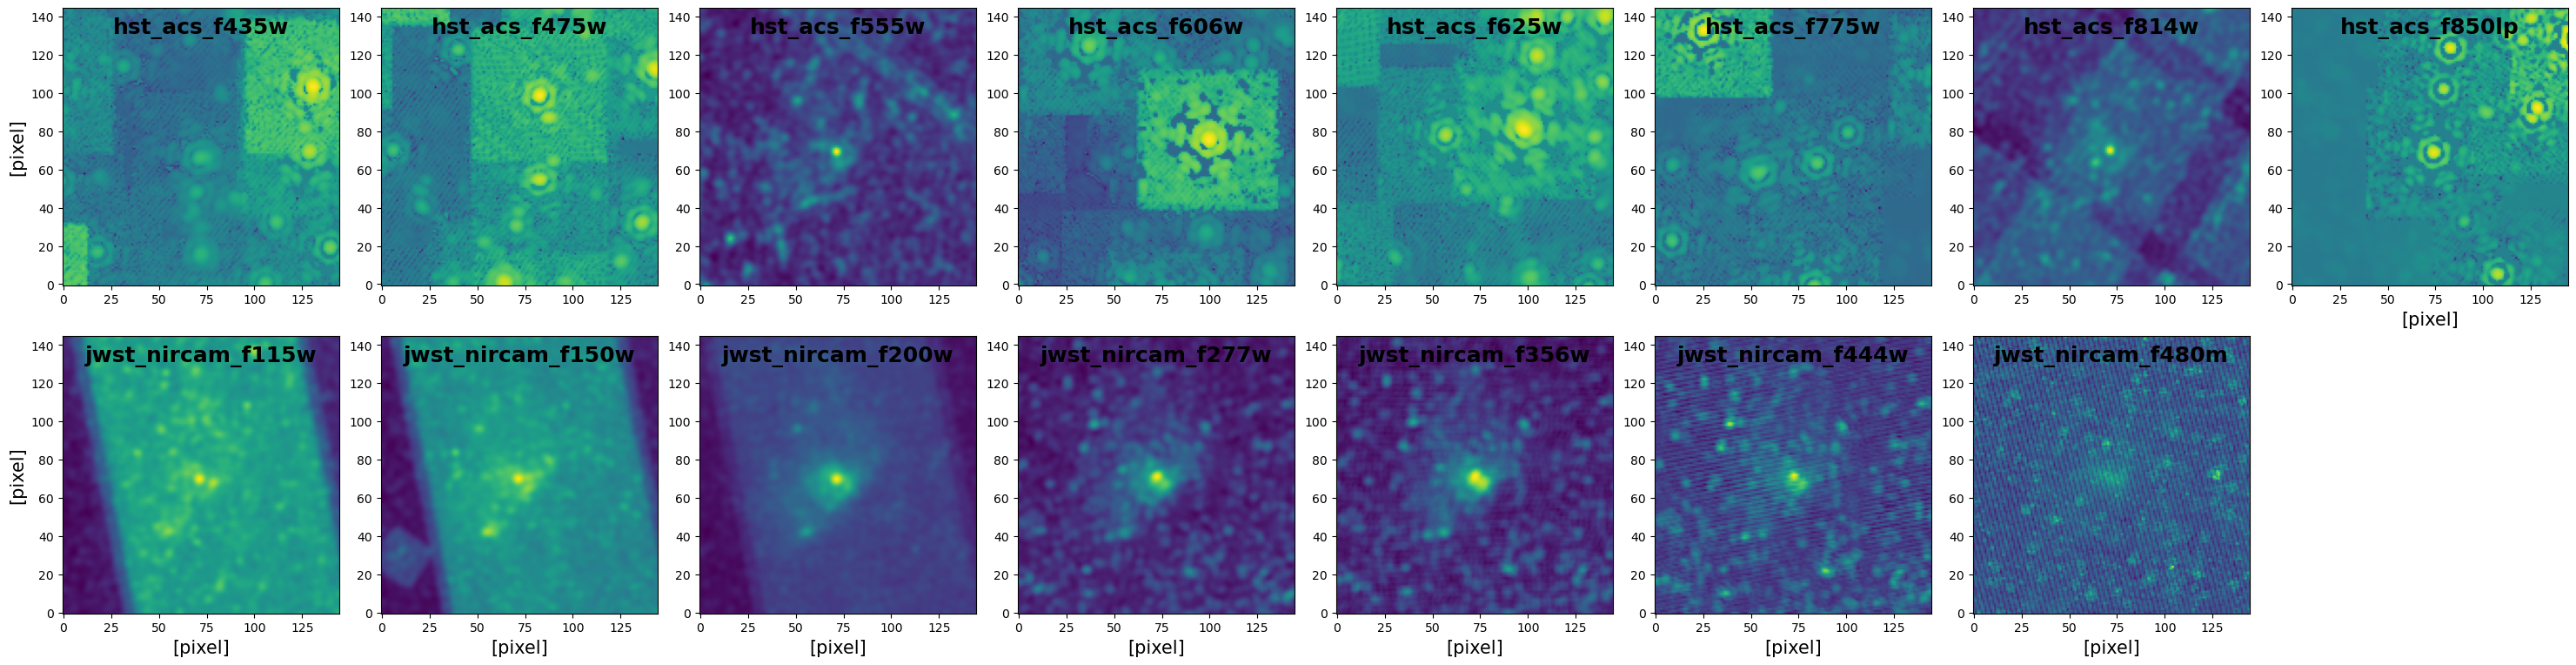

In [4]:
%matplotlib inline
img_process.plot_image_stamps(ncols=8)

## Define galaxy's region of interest using segmentation maps

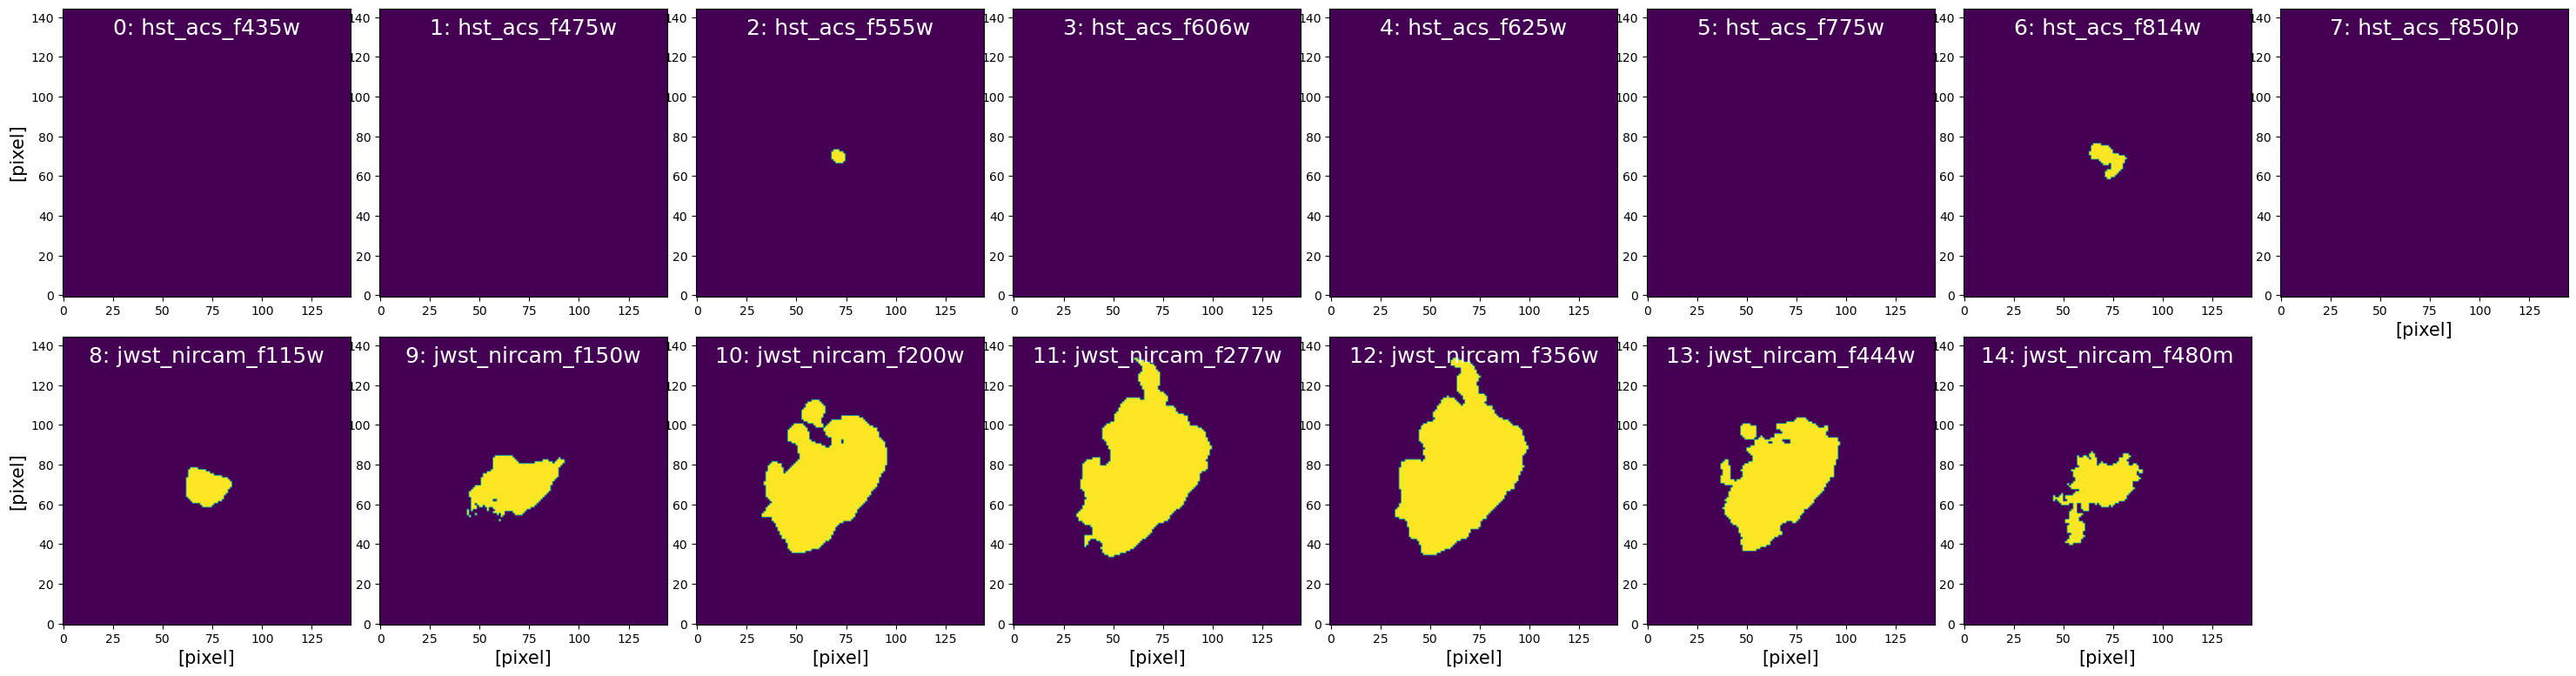

In [5]:
img_process.segmentation_sep(thresh=2.0, minarea=0, deblend_nthresh=32, deblend_cont=0.05)
img_process.plot_segm_maps(ncols=8)

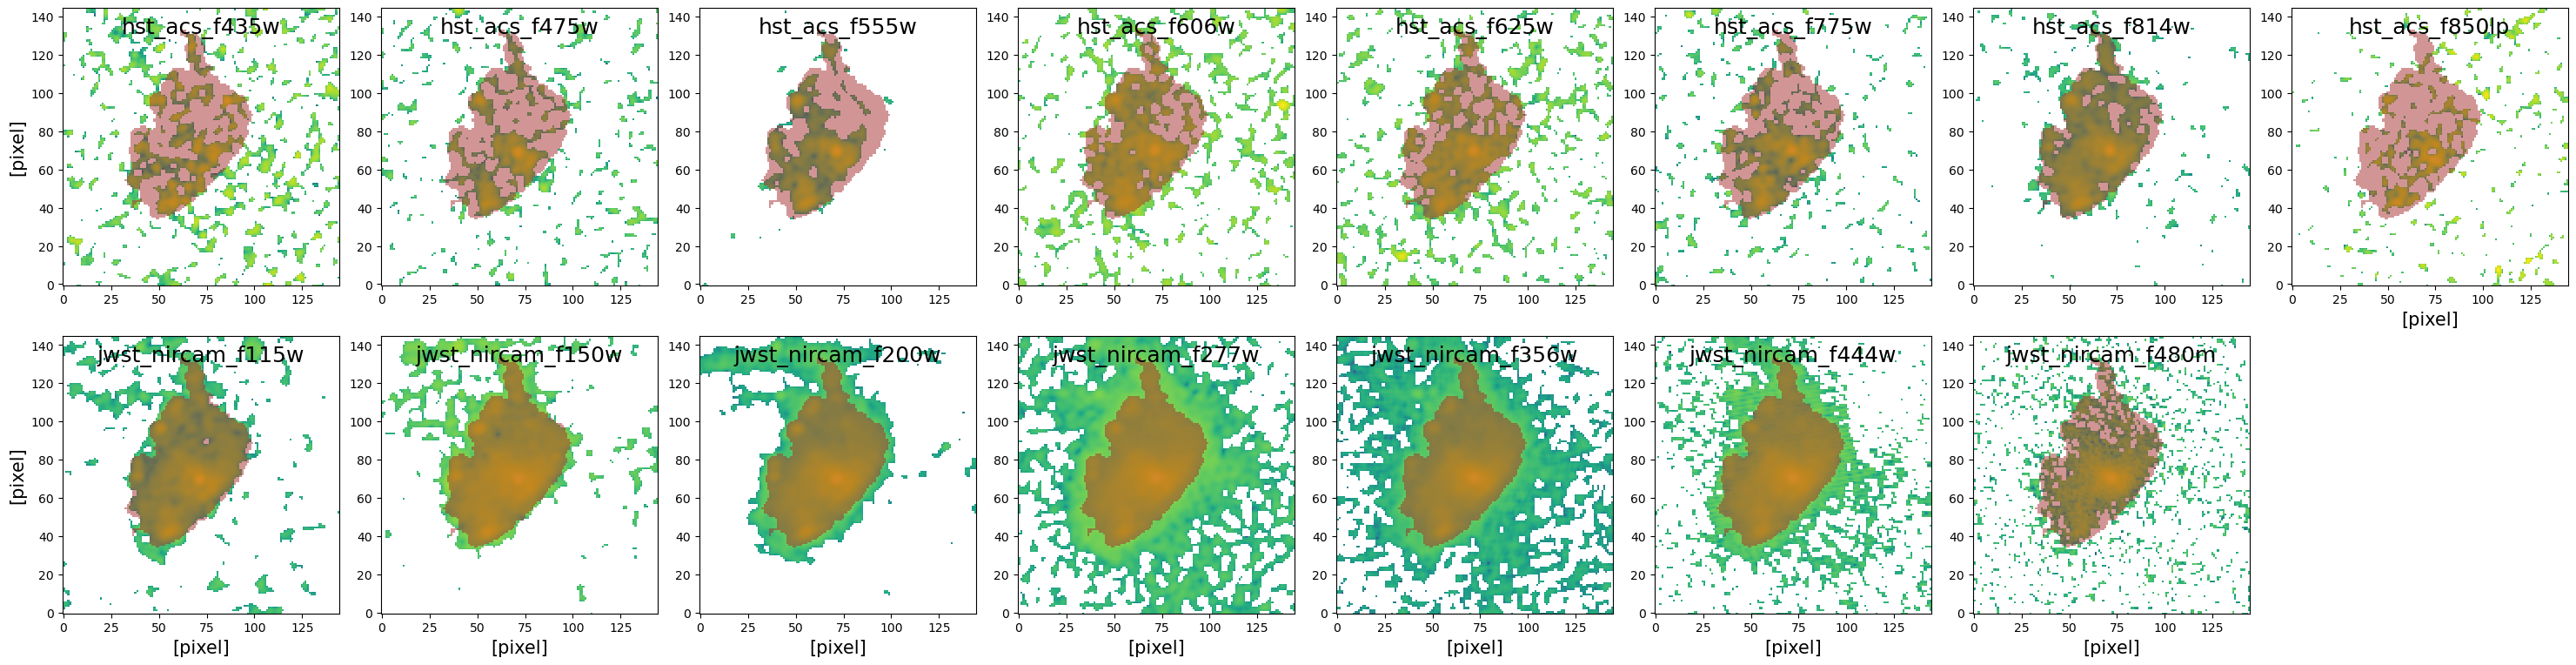

In [6]:
# Define galaxy's region
segm_maps_ids = [8,9,10,11,12,13]
gal_region = img_process.galaxy_region(segm_maps_ids)

# plot the defined galaxy's region
img_process.plot_gal_region(gal_region, ncols=8)

## Calculate maps of fluxes and flux uncertainties

In [7]:
# Get the estimate of foreground Galactic dust extinction
from piXedfit.piXedfit_images import EBV_foreground_dust

Gal_EBV = EBV_foreground_dust(gal_ra, gal_dec)
print ('Gal_EBV = %lf' % Gal_EBV)

Gal_EBV = 0.092997


In [8]:
# Calculate maps of multiband fluxes
flux_maps_fits = "fluxmap.fits"
img_process.flux_map(gal_region, Gal_EBV=Gal_EBV, name_out_fits=flux_maps_fits)

'fluxmap.fits'

## Plot maps of fluxes and flux uncertainties

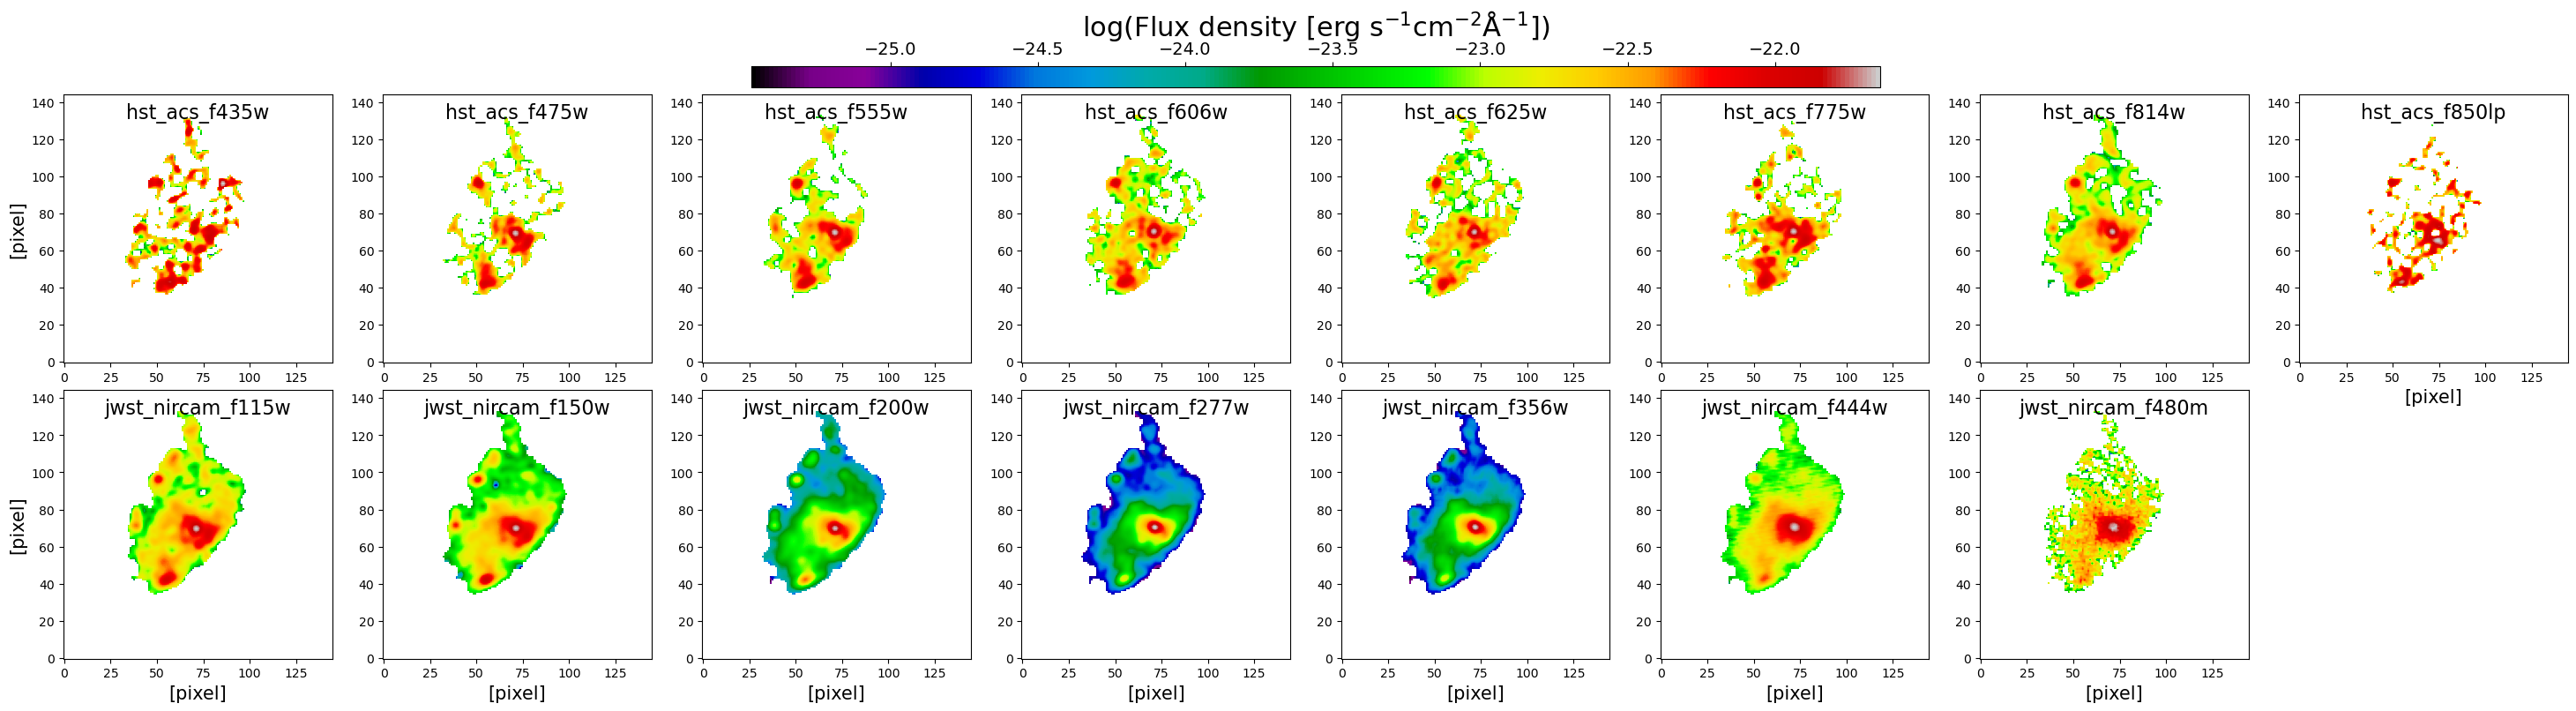

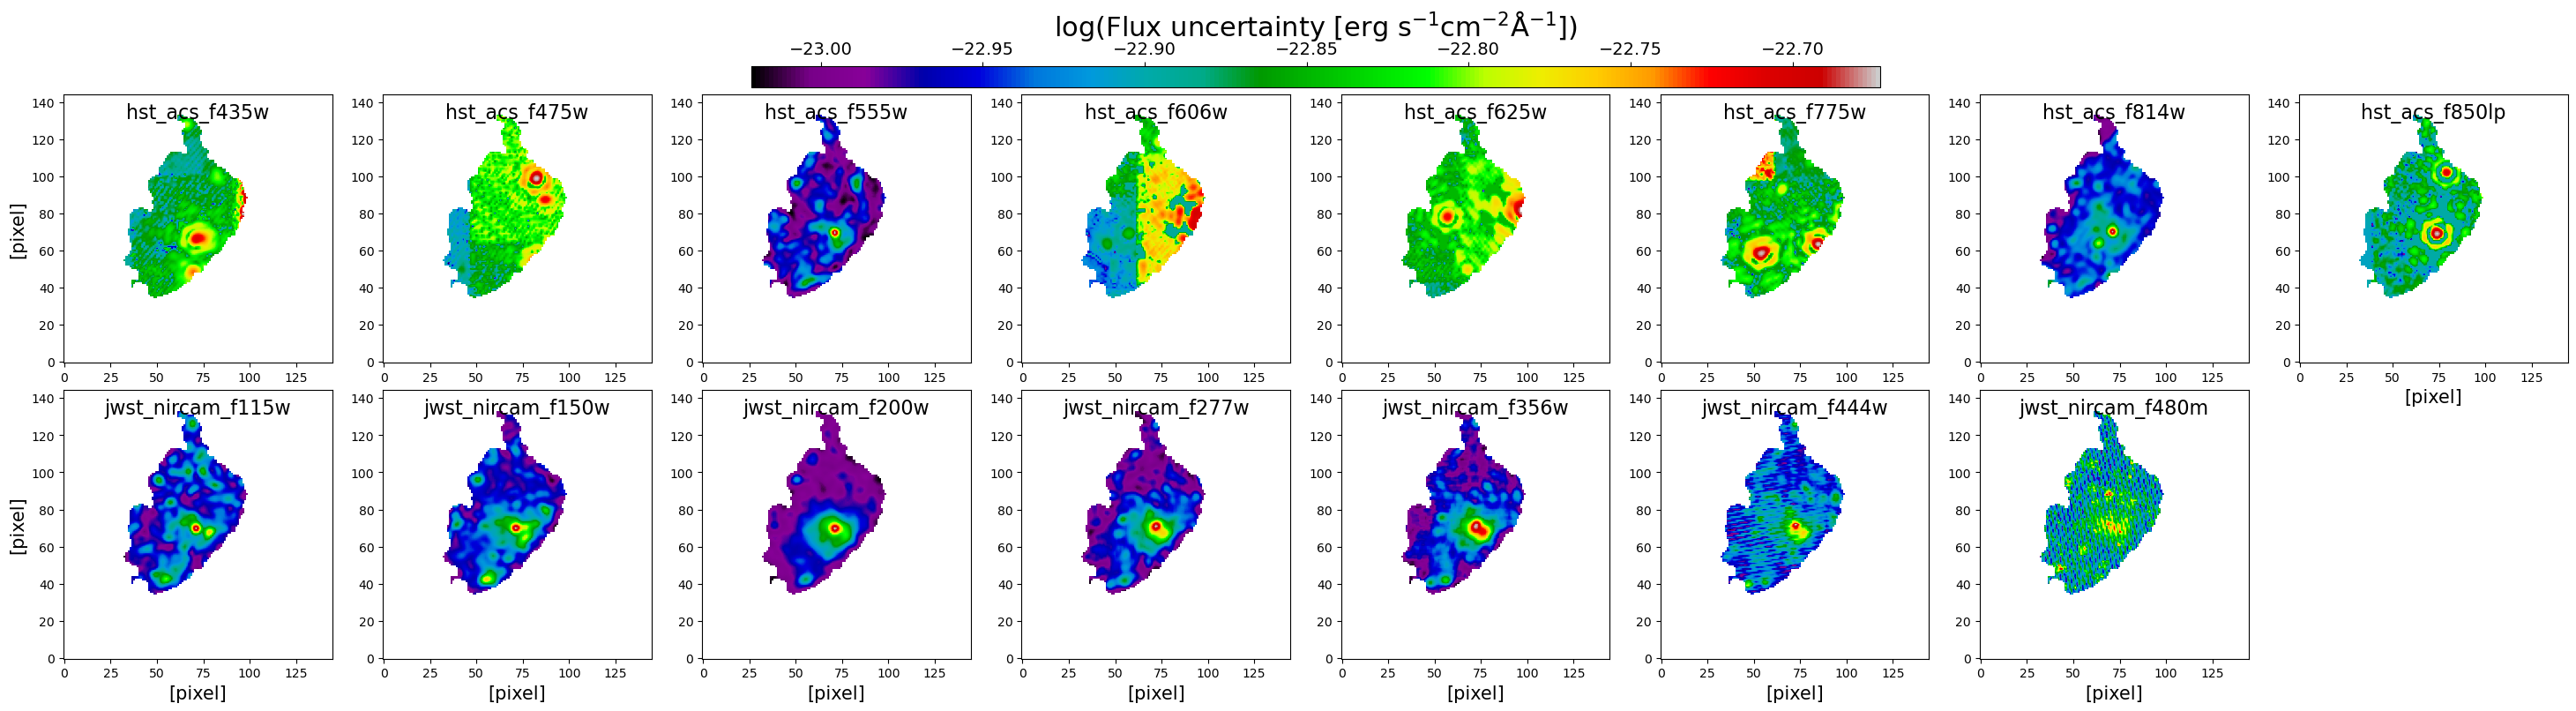

In [9]:
from piXedfit.piXedfit_images import plot_maps_fluxes

flux_maps_fits = "fluxmap.fits"
plot_maps_fluxes(flux_maps_fits, ncols=8)

## Plot SEDs of some pixels

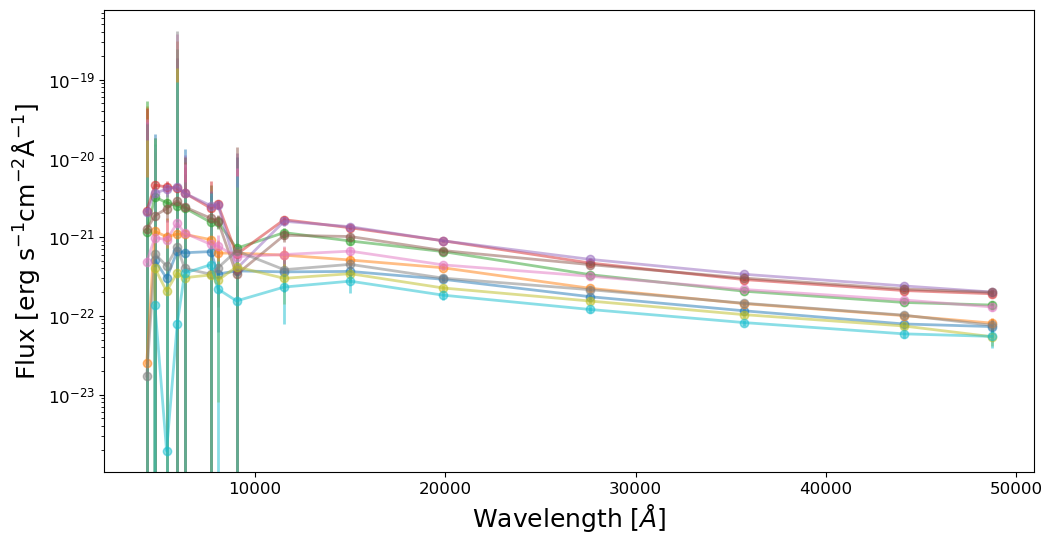

In [10]:
# plot SEDs of pixels around the center

from piXedfit.piXedfit_images import get_pixels_SED_fluxmap

pix_x = np.arange(67,77)
pix_y = np.arange(67,77)
pix_x, pix_y, pix_SED_flux, pix_SED_flux_err, photo_wave = get_pixels_SED_fluxmap(flux_maps_fits, pix_x=pix_x, pix_y=pix_y)

fig1 = plt.figure(figsize=(12,6))
f1 = plt.subplot()
f1.set_yscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $\rm{s}^{-1}\rm{cm}^{-2}\AA^{-1}$]", fontsize=18)
plt.setp(f1.get_xticklabels(), fontsize=12)
plt.setp(f1.get_yticklabels(), fontsize=12)

for ii in range(len(pix_x)):
    plt.errorbar(photo_wave, pix_SED_flux[ii], yerr=pix_SED_flux_err[ii], fmt='-o', lw=2, alpha=0.5)


## Plot the radial profiles of S/N Ratios 

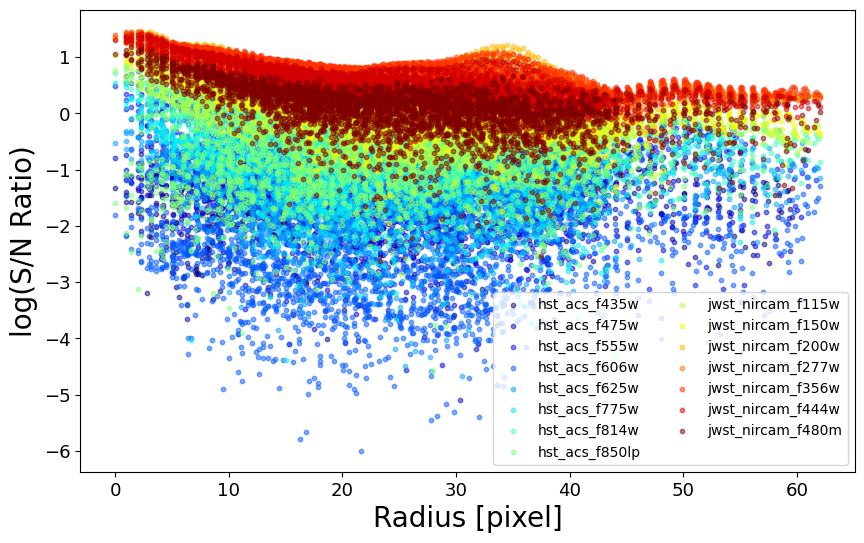

In [11]:
from piXedfit.piXedfit_images import plot_SNR_radial_profile

plot_SNR_radial_profile(flux_maps_fits)